In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmaps as cmaps
from scipy.stats import pearsonr
import pandas as pd 
import cartopy, cartopy.crs as ccrs  # Plot maps
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

with open(r"C:\Users\deela\Downloads\NHCDvorakFixes.txt", 'r', encoding='utf-8', errors='replace') as data:
    data = data.read().split('\n')

In [2]:
dictDvk = {10 : 1.0,
           15 : 1.0,
           20 : 1.0,
           25 : 1.5,
           30 : 2.0,
           35 : 2.5,
           45 : 3.0,
           55 : 3.5,
           65 : 4.0,
           77 : 4.5,
           90 : 5.0,
           102: 5.5,
           115: 6.0,
           127: 6.5,
           140: 7.0,
           155: 7.5,
           170: 8.0,
           195: 8.5}

In [ ]:
def processData(data, fixType = 'DVTS', value = 140.):
    lats = []
    lons = []
    vmax = []
    dvts = []
    for x in range(len(data)):
        temp = data[x].split(',')
        temp = [a.strip() for a in temp]
        try:
            fix = temp[4]
            vmx = int(temp[11]) 
        except:
            continue
        if fix == fixType:# and vmx == value:
            lat = float(temp[7][:-1]) / 100
            if temp[8][-1:] == 'E':
                lon = float(temp[8][:-1]) / 100
            else:
                lon = float(temp[8][:-1]) / -100

            try:
                dvts.append(dictDvk[vmx])
                lats.append(lat)
                lons.append(lon)
                vmax.append(vmx)
            except:
                print(temp)
    return np.array(lats), np.array(lons), np.array(vmax), np.array(dvts)

In [4]:
def makeMap(ax, interval, labelsize):
    ax.set_frame_on(False)
    
    # Add state boundaries to plot
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.5)
    ax.set_xticks(np.arange(-180, 181, interval), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, interval), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.tick_params(axis='both', labelsize=labelsize, left = False, bottom = False)
    ax.grid(linestyle = '--', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)

    return ax 

In [5]:
lats, lons, vmax, dvts = processData(data)

['EP', '07', '199407281130', '10', 'DVTS', 'CI', '', '1280N', '16520W', '', '2', '63', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'PHNL', '', 'I', '3', '3039 /////', '', '25', '', '', '', 'CONVECTION INCREASING']
['AL', '30', '200511291145', '10', 'DVTS', 'CI', '', '3160N', '5000W', '', '2', '40', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'SAB', 'LL', 'VI', '3', '2525 /////', '', '', 'GOES12', 'CSC', 'S', '']
['AL', '01', '200606120545', '10', 'DVTS', 'CI', '', '2560N', '8770W', '', '3', '40', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'SAB', 'RG', 'I', '5', '2525 /////', '', '', 'GOES12', 'CSC', 'S', '']
['AL', '08', '200609140645', '10', 'DVTS', 'CI', '', '2840N', '5680W', '', '1', '105', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'TAFB', 'RG', 'I', '1', '5555 /////', '', '', 'GOES12', 'CSC', 'T', 'DT = 5.5 BASED ON IR EYE PATTERN. NLINEEYE COLOR--']
['AL', '08', '2

In [6]:
#sort data by intensity 

id = np.argsort(dvts)
lons = lons[id]
lats = lats[id]
dvts = dvts[id]

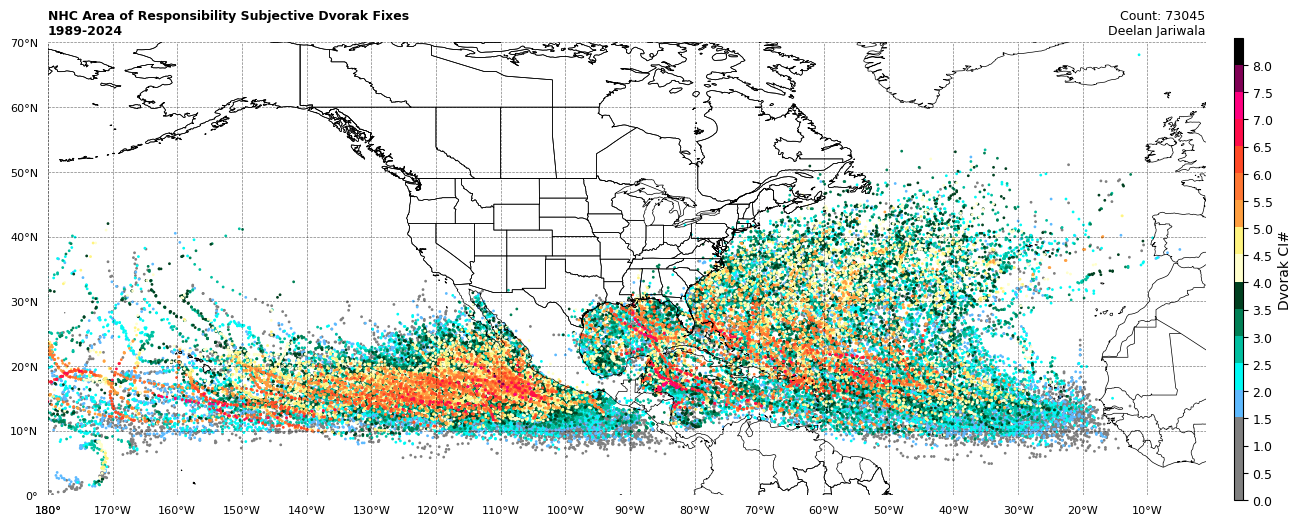

In [7]:
fig = plt.figure(figsize=(18, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax = makeMap(ax, 10, 8)
# ax.set_extent([120, 270, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([260, 359, 5, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([220, 270, 5, 35], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([120, 359, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
ax.set_extent([180, 359, 0, 70], crs = ccrs.PlateCarree(central_longitude=0))

c = ax.scatter(lons, lats, c = dvts, s = 1, cmap = cmaps.dvorak2(), vmin = 0, vmax = 8.5, transform = ccrs.PlateCarree(central_longitude = 0))

cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02, label = 'Dvorak CI#')
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
cbar.set_ticks(np.arange(0, 8.5, .5))

plt.title(f'NHC Area of Responsibility Subjective Dvorak Fixes\n1989-2024' , fontweight='bold', fontsize=9, loc='left')
plt.title(f'Count: {len(lats)}\nDeelan Jariwala', fontsize = 9, loc='right')  
# plt.savefig(r"C:\Users\deela\Downloads\allfixes_EP.png", dpi = 400, bbox_inches = 'tight')
plt.show()


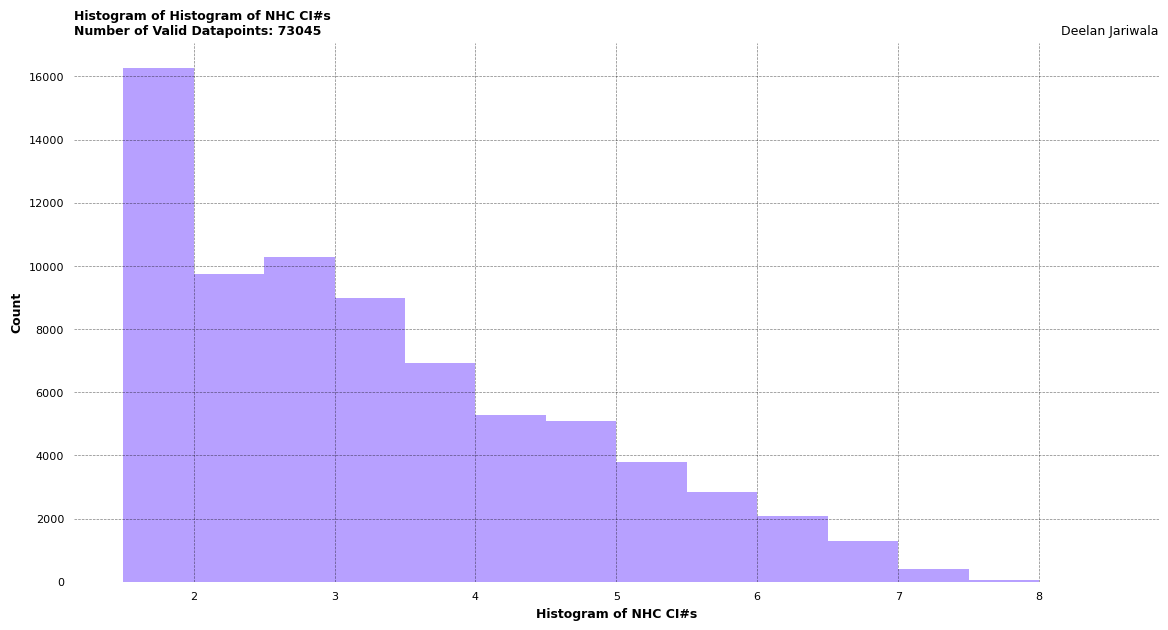

In [13]:
from defaultPlots import histogram as hist 

hist(['Histogram of NHC CI#s', dvts], bounds = [1.5, 9, 0.5])

In [121]:
with open(r"C:\Users\deela\Downloads\nhcaircfixes.txt", 'r', encoding='utf-8') as data:
    data = data.read().split('\n')

In [243]:
def processData2(data, fixType = 'AIRC', value = 140.):
    lats = []
    lons = []
    flwi = []
    mslp = []
    for x in range(len(data)):
        temp = data[x].split(',')
        temp = [a.strip() for a in temp]
        try:
            fix = temp[4]
        except:
            fix = 'AIRC'
            print(x, temp)
        if fix == fixType:# and vmx == value:
            try:
                lat = float(temp[7][:-1]) / 100
                if temp[8][-1:] == 'E':
                    lon = float(temp[8][:-1]) / 100
                else:
                    lon = float(temp[8][:-1]) / -100

                m = int(temp[13])
                f = int(temp[39])
            except Exception as e:
                continue
            lats.append(lat)
            lons.append(lon)
            mslp.append(m)
            flwi.append(f)
    return np.array(lats), np.array(lons), np.array(mslp), np.array(flwi)

In [245]:
lats, lons, mslp, flwi = processData2(data)
print(lats.shape, lons.shape, mslp.shape, flwi.shape)

#sort data by intensity 

id = np.flip(np.argsort(mslp))
lons = lons[id]
lats = lats[id]
mslp = mslp[id]
flwi = flwi[id]

(9999,) (9999,) (9999,) (9999,)


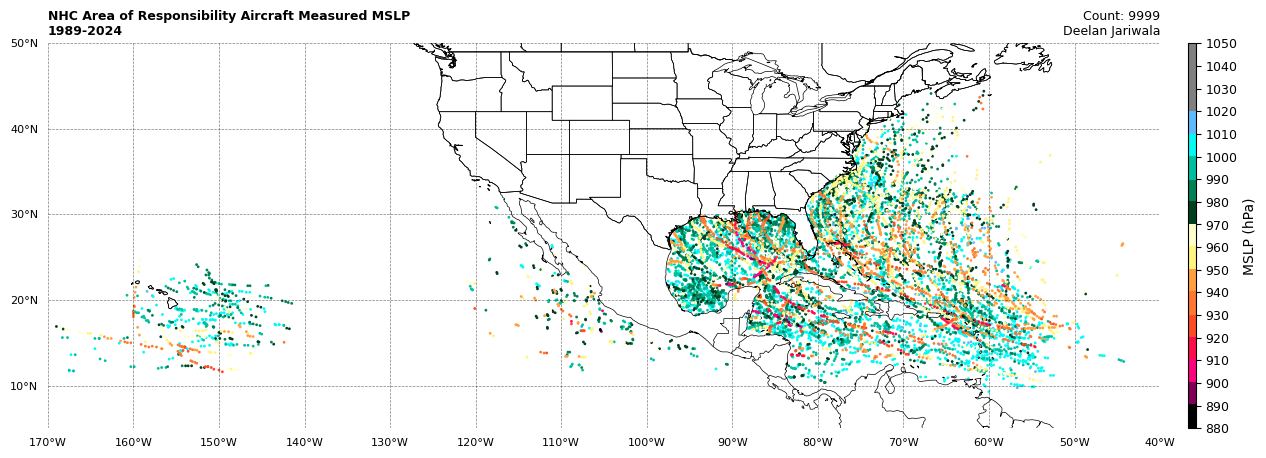

In [238]:
fig = plt.figure(figsize=(18, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax = makeMap(ax, 10, 8)
# ax.set_extent([120, 270, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([260, 359, 5, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([220, 270, 5, 35], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([120, 359, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
ax.set_extent([190, 320, 5, 50], crs = ccrs.PlateCarree(central_longitude=0))

c = ax.scatter(lons, lats, c = mslp, s = 1, cmap = cmaps.dvorak2().reversed(), vmin = 880, vmax = 1050, transform = ccrs.PlateCarree(central_longitude = 0))

cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02, label = 'MSLP (hPa)')
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
cbar.ax.set_yticks(np.arange(880, 1060, 10))

plt.title(f'NHC Area of Responsibility Aircraft Measured MSLP\n1989-2024' , fontweight='bold', fontsize=9, loc='left')
plt.title(f'Count: {len(lats)}\nDeelan Jariwala', fontsize = 9, loc='right')  
plt.savefig(r"C:\Users\deela\Downloads\allfixes_mslp.png", dpi = 400, bbox_inches = 'tight')
plt.show()

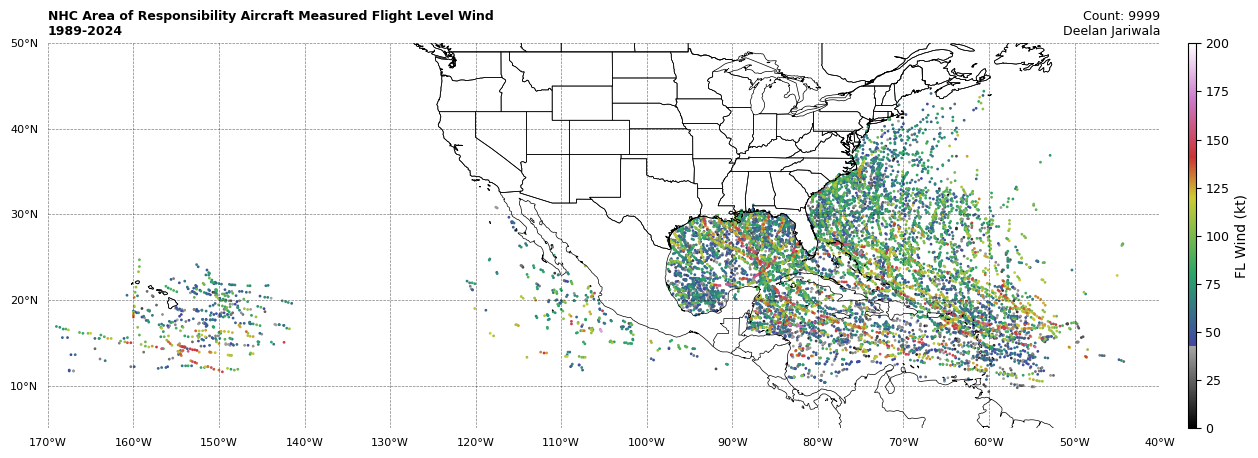

In [240]:
id = np.argsort(flwi)
lons = lons[id]
lats = lats[id]
mslp = mslp[id]
flwi = flwi[id]

fig = plt.figure(figsize=(18, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax = makeMap(ax, 10, 8)
# ax.set_extent([120, 270, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([260, 359, 5, 60], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([220, 270, 5, 35], crs = ccrs.PlateCarree(central_longitude=0))
# ax.set_extent([120, 359, 0, 60], crs = ccrs.PlateCarree(central_longitude=0))
ax.set_extent([190, 320, 5, 50], crs = ccrs.PlateCarree(central_longitude=0))

c = ax.scatter(lons, lats, c = flwi, s = 1, cmap = cmaps.wind(), vmin = 0, vmax = 200, transform = ccrs.PlateCarree(central_longitude = 0))

cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02, label = 'FL Wind (kt)')
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
# cbar.ax.set_yticks(np.arange(880, 1060, 10))

plt.title(f'NHC Area of Responsibility Aircraft Measured Flight Level Wind\n1989-2024' , fontweight='bold', fontsize=9, loc='left')
plt.title(f'Count: {len(lats)}\nDeelan Jariwala', fontsize = 9, loc='right')  
plt.savefig(r"C:\Users\deela\Downloads\allfixes_wind.png", dpi = 400, bbox_inches = 'tight')
plt.show()